In [8]:
# Configure Jupyter so figures appear in the noebook
%matplotlib inline

# import functions from the modsim.py module
from modsim import *
import random
from pandas import read_html

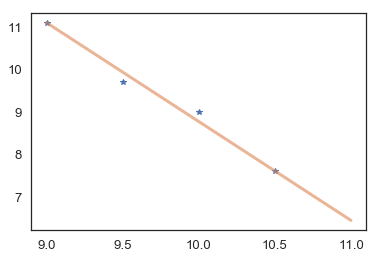

In [9]:
import matplotlib.pyplot as plt
plt.plot([9,9.5,10,10.5], [11.1, 9.7, 9, 7.6], '*')

def run_match():
    match = TimeSeries()
    match[9] = 11.1
    for p in linrange(9, 11, 1):
        match [p+1] = match[p] - 2.33
    return match

p2 = run_match()
plot (p2)
plt.show()

In [10]:
def run_match2():
    match = TimeSeries()
    match[9] = 11.1
    for p in linrange(9, 11, 1):
        match [p+1] = match[p] - 2.33
    return match[11]
run_match2()

6.4399999999999995

In [11]:
birth_rate_normal = 0.12
birth = run_match2()
birth1 = birth_rate_normal*(birth/11.1)
values = System(death=0.1, birthi = birth1-0.07, birthii = birth1+0.07, pop_0 = 70, time_period = 52)
values.pop_0 = 40

In [12]:
def run_ph_sim(system):
    run = TimeSeries()
    run[0] = system.pop_0
    for t in linrange (0, values.time_period, 1):
        for x in range(1):
            b = random.uniform(system.birthi, system.birthii)
        run[t+1] = run[t] + run[t]*(b)-run[t]*(system.death)
    return run
def plot_rps(variable, title):
    plot (variable, label = 'my population')
    decorate(xlabel = 'time (weeks)',
            ylabel = 'population of crustaceans',
            title = title)

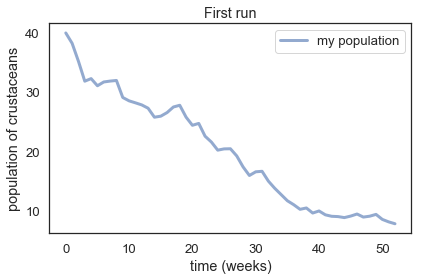

In [13]:
x = run_ph_sim(values)
plot_rps(x, 'First run')

In [14]:
def run_ph_sim2(system):
    run = TimeSeries()
    run[0] = system.pop_0
    for t in linrange (0, values.time_period, 1):
        for x in range(1):
            b = random.uniform(system.birthi, system.birthii)
        run[t+1] = run[t] + run[t]*(b)-run[t]*(system.death)
    return run[52]

In [15]:
extinct = State(extinct = 0)
def run_program(number_of_runs, system):
    for i in range (number_of_runs):
        x = run_ph_sim2(system)
        if x<=8:
            extinct.extinct +=1

In [16]:
run_program(100, values)
extinct.extinct

51